# Which would you buy?
- https://www.youtube.com/watch?v=7cupIlG7-D0&list=PLvcbYUQ5t0UH2MS_B6maLNJhK0jNyPJUY&index=40&t=407s

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()


In [5]:
def get_avg_rating(rating_distr, n):
    vals = np.random.random(n).reshape(-1, 1)
    ratings = 1 + np.argmax(vals < rating_distr.cumsum(), axis=1)
    return ratings.mean()


# Small Sample (n=100 and 4.1 stars)

In [6]:
rating_distr_1 = np.array([.05, .05, .05, .45, .40])
n1 = 100
small_samp_means = np.array([get_avg_rating(rating_distr_1, n1) for _ in range(10000)])


Text(0.5, 1.0, 'n=100')

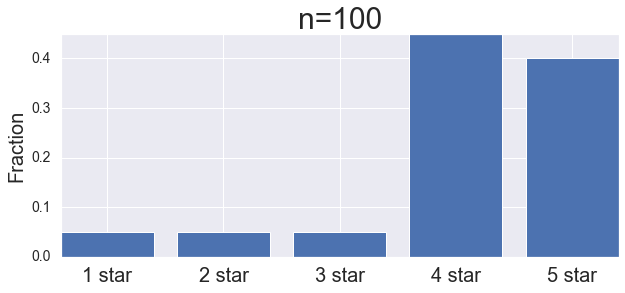

In [10]:
plt.figure(figsize=(10, 4))
plt.bar([str(i) + ' star' for i in np.arange(1, 6)], rating_distr_1)
plt.xticks(np.arange(5), fontsize=20)
plt.yticks(np.arange(0, .5, .1), fontsize=14)
plt.ylabel('Fraction', fontsize=20)
plt.title('n=%s'%n1, fontsize=30)


mu=4.101556, dev=0.10392054110713629


/Users/ychen/Documents/projects/research/env3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


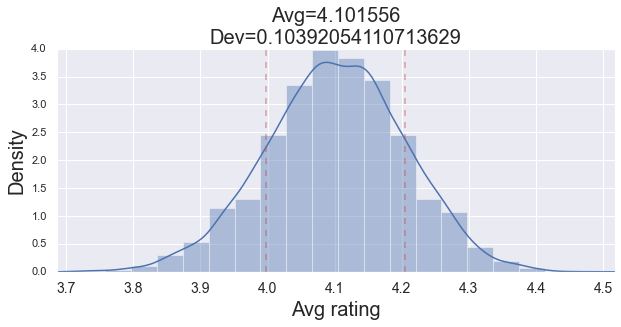

In [27]:
plt.figure(figsize=(10, 4))
ax = sns.distplot(small_samp_means, bins=20)
plt.xlabel('Avg rating', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.xticks(np.arange(0, 5.1, .1), fontsize=14)
mu = small_samp_means.mean()
dev = small_samp_means.std()
a = mu - 4*dev
b = mu + 4*dev
print(f"mu={mu}, dev={dev}")
#plt.xlim(a, b)
ax.set_xlim(a, b)
plt.title('Avg=%s\nDev=%s'%(mu, dev), fontsize=20)
plt.axvline(mu+dev, color='r', linestyle='--', alpha=0.5)
plt.axvline(mu-dev, color='r', linestyle='--', alpha=0.5)


# Large Sample (n=1000 and 4 stars)

In [23]:
rating_distr_2 = np.array([.05, .05, .05, .55, .3])
n2 = 1000
large_samp_means = np.array([get_avg_rating(rating_distr_2, n2) for _ in range(10000)])


Text(0.5, 1.0, 'n=1000')

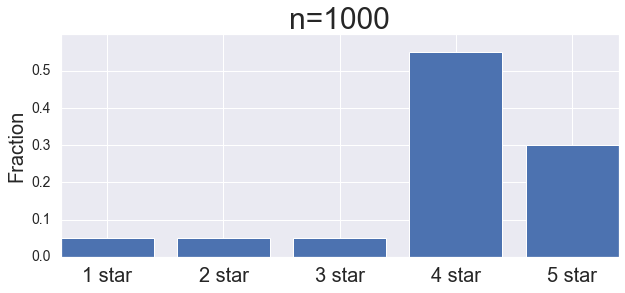

In [24]:
plt.figure(figsize=(10, 4))
plt.bar([str(i) + ' star' for i in np.arange(1, 6)], rating_distr_2)
plt.xticks(np.arange(5), fontsize=20)
plt.yticks(np.arange(0, .6, .1), fontsize=14)
plt.ylabel('Fraction', fontsize=20)
plt.title('n=%s'%n2, fontsize=30)


mu=4.0001394, dev=0.03195513992521389


/Users/ychen/Documents/projects/research/env3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


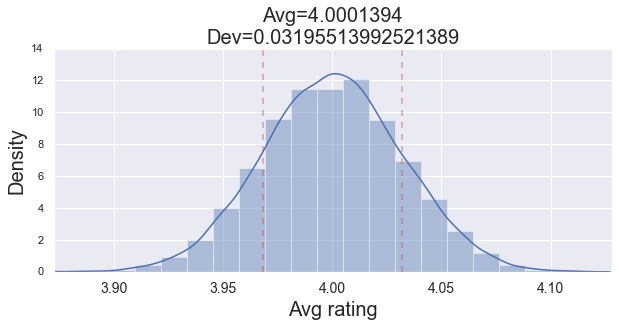

In [28]:
plt.figure(figsize=(10, 4))
ax = sns.distplot(large_samp_means, bins=20)
plt.xlabel('Avg rating', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.xticks(np.arange(0, 5.05, .05), fontsize=14)
mu = large_samp_means.mean()
dev = large_samp_means.std()
a = mu - 4*dev
b = mu + 4*dev
print(f"mu={mu}, dev={dev}")
ax.set_xlim(a, b)
plt.title('Avg=%s\nDev=%s'%(mu, dev), fontsize=20)
plt.axvline(mu+dev, color='r', linestyle='--', alpha=0.5)
plt.axvline(mu-dev, color='r', linestyle='--', alpha=0.5)


# Plot both together

/Users/ychen/Documents/projects/research/env3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ychen/Documents/projects/research/env3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


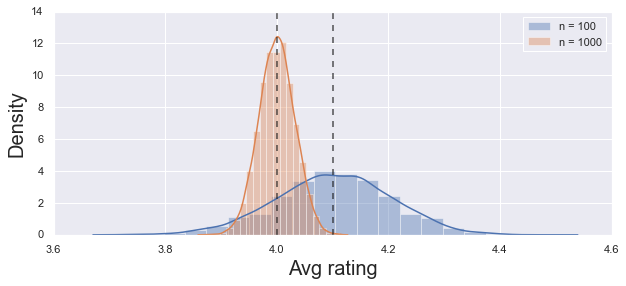

In [35]:
plt.figure(figsize=(10, 4))
sns.distplot(small_samp_means, bins=20, label='n = 100')
sns.distplot(large_samp_means, bins=20, label='n = 1000')
plt.legend()
plt.xlabel('Avg rating', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.axvline(small_samp_means.mean(), color='k', linestyle='--', alpha=0.75)
plt.axvline(large_samp_means.mean(), color='k', linestyle='--', alpha=0.75)


In [44]:
diff_means = small_samp_means - large_samp_means
print(diff_means.mean())
print(np.mean(diff_means > 0))


0.10141660000000001
0.8234


/Users/ychen/Documents/projects/research/env3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


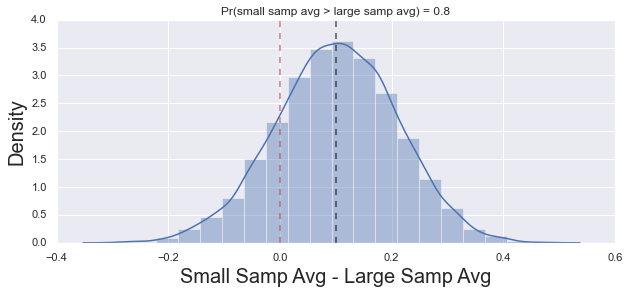

In [45]:
plt.figure(figsize=(10, 4))
sns.distplot(diff_means, bins=20)
plt.title('Pr(small samp avg > large samp avg) = %s'%round(np.mean(diff_means > 0), 1))
plt.xlabel('Small Samp Avg - Large Samp Avg', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.axvline(diff_means.mean(), color='k', linestyle='--', alpha=0.75)
plt.axvline(0.0, color='r', linestyle='--', alpha=0.75)


# Play around with different sample size (n) and distributions (rating_distr)